In [3]:
#Import needed libs
import dash
import dash_bootstrap_components as dbc
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import numpy as np
import pandas as pd
import plotly.express as px

In [4]:
#Import data/cleanup
dfcon=pd.read_csv('concated.csv')
df=pd.read_csv('LadderScoreAllFixed.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
dfgdp=pd.read_csv('LadderScoreAllFixed.csv')

In [6]:
#df=df.set_index('Country name')

In [7]:
df.head()

,Country name,Ladder score 2015,Ladder score 2016,Ladder score 2017,Ladder score 2018,Ladder score 2019,Ladder score 2020
0,Finland,7.406,7.413,7.469,7.632,7.769,7.8087
1,Denmark,7.527,7.526,7.522,7.555,7.600,7.6456
2,Norway,7.522,7.498,7.537,7.594,7.554,7.4880
3,Iceland,7.561,7.501,7.504,7.495,7.494,7.5045
4,Netherlands,7.378,7.339,7.377,7.441,7.488,7.4489


In [8]:
dfcon.head()

,Unnamed: 0,Country name,Score,year
0,0,Finland,7.8087,2020
1,1,Denmark,7.6456,2020
2,2,Switzerland,7.5599,2020
3,3,Iceland,7.5045,2020
4,4,Norway,7.4880,2020


In [15]:
#Create Relevant Plots
fig = px.scatter(dfcon,x='Country name', y='Score', animation_frame='year', color='Country name')
fig.update_layout(margin=dict(l=40, r=40, t=40, b=200))
fig['layout']['updatemenus'][0]['pad']=dict(r= 10, t= 150)
fig['layout']['sliders'][0]['pad']=dict(r= 10, t= 150,)

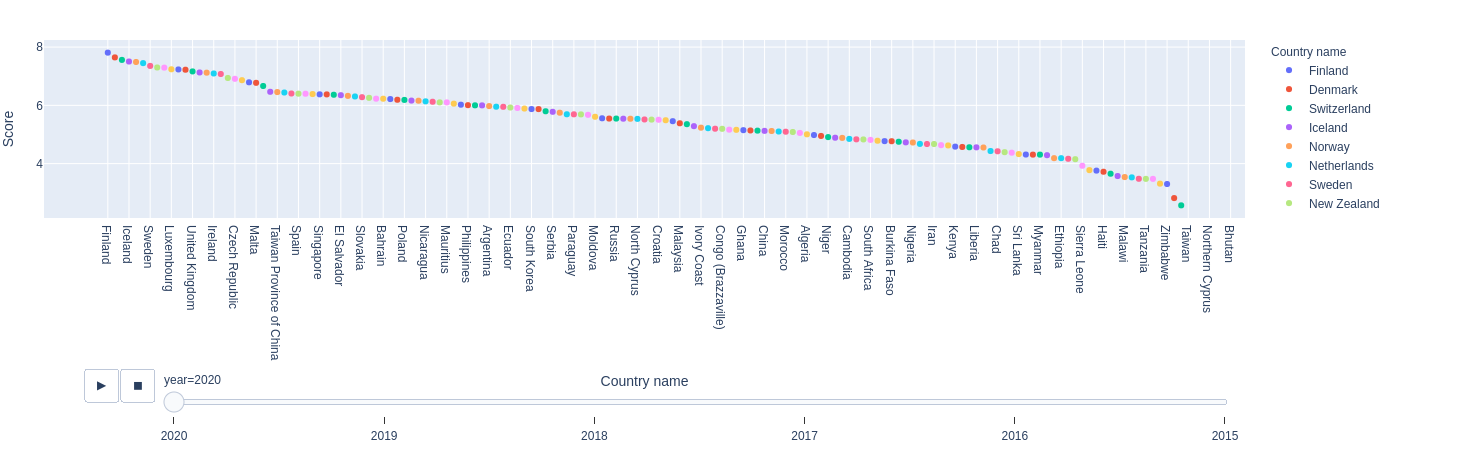

In [16]:
fig.show()

In [9]:
"""
This app creates a simple sidebar layout using inline style arguments and the
dbc.Nav component.

dcc.Location is used to track the current location, and a callback uses the
current location to render the appropriate page content. The active prop of
each NavLink is set automatically according to the current pathname. To use
this feature you must install dash-bootstrap-components >= 0.11.0.

For more details on building multi-page Dash applications, check out the Dash
documentation: https://dash.plot.ly/urls
"""


app = dash.Dash(external_stylesheets=[dbc.themes.BOOTSTRAP])

# the style arguments for the sidebar. We use position:fixed and a fixed width
SIDEBAR_STYLE = {
    "position": "fixed",
    "top": 0,
    "left": 0,
    "bottom": 0,
    "width": "16rem",
    "padding": "2rem 1rem",
    "background-color": "#f8f9fa",
}

# the styles for the main content position it to the right of the sidebar and
# add some padding.
CONTENT_STYLE = {
    "margin-left": "18rem",
    "margin-right": "2rem",
    "padding": "2rem 1rem",
}

sidebar = html.Div(
    [
        html.H2("Sidebar", className="display-4"),
        html.Hr(),
        html.P(
            "A simple sidebar layout with navigation links", className="lead"
        ),
        dbc.Nav(
            [
                dbc.NavLink("Home", href="/", active="exact"),
                dbc.NavLink("Page 1", href="/page-1", active="exact"),
                dbc.NavLink("Page 2", href="/page-2", active="exact"),
            ],
            vertical=True,
            pills=True,
        ),
    ],
    style=SIDEBAR_STYLE,
)

content = html.Div(id="page-content", style=CONTENT_STYLE)

app.layout = html.Div([dcc.Location(id="url"), sidebar, content])


@app.callback(Output("page-content", "children"), [Input("url", "pathname")])
def render_page_content(pathname):
    if pathname == "/":
        return [
            html.P("This is the content of the home page!"),
            dcc.Graph(id='scattergraph', figure=fig)
            
                ]
    
    elif pathname == "/page-1":
        return html.P("This is the content of page 1. Yay!")
    elif pathname == "/page-2":
        return html.P("Oh cool, this is page 2!")
    # If the user tries to reach a different page, return a 404 message
    return dbc.Jumbotron(
        [
            html.H1("404: Not found", className="text-danger"),
            html.Hr(),
            html.P(f"The pathname {pathname} was not recognised..."),
        ]
    )


In [ ]:
#Run app
if __name__ == "__main__":
    app.run_server(port=8899)

Dash is running on http://127.0.0.1:8899/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8899/ (Press CTRL+C to quit)
127.0.0.1 - - [01/Feb/2021 00:01:50] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [01/Feb/2021 00:01:51] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [01/Feb/2021 00:01:51] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [01/Feb/2021 00:01:51] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [01/Feb/2021 00:02:22] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [01/Feb/2021 00:02:23] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [01/Feb/2021 00:02:23] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [01/Feb/2021 00:02:23] "POST /_dash-update-component HTTP/1.1" 200 -
